# Overview of the routines in `biosspheres.quadratures`

## Preliminaries

### Spherical coordinate system

A vector is written as $\mathbf{r}=\left(r,\varphi,\theta\right)^t$, with $r \in [0,\infty)$, $\varphi \in [0,2\pi)$ and $\theta \in [0,\pi]$, which in Cartesian coordinates is equivalent to $\mathbf{r}=r\left(\sin \theta \cos \varphi,\sin \theta \sin \varphi,\cos \theta\right)^t$. The unitary vectors of the spherical coordinate system can be written in Cartesian coordinates as
$$\begin{align*}
    &\widehat{\mathbf{e}}_r= (\sin \theta \cos \varphi , \sin \theta \sin \varphi , \cos \theta )^t, \\
    &\widehat{\mathbf{e}}_\theta=(\cos \theta \cos \varphi , \cos \theta \sin \varphi , -\sin \theta  )^t, \\
    &\widehat{\mathbf{e}}_{\varphi}=(-\sin \varphi , \cos \varphi , 0 )^t.
\end{align*}$$

The gradient operator in spherical coordinates:
$$\begin{align*}
    \nabla f&=\frac{\partial f}{\partial r} \widehat{\mathbf{e}}_r+\frac{1}{r} \frac{\partial f}{\partial \theta} \widehat{\mathbf{e}}_\theta+\frac{1}{r \sin \theta} \frac{\partial f}{\partial \varphi} \widehat{\mathbf{e}}_{\varphi}
\end{align*}$$

### Real spherical harmonics

Real spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$\begin{align}
		 Y_{l,m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0}) \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \cos m \varphi , \mbox{ and}\\
		Y_{l,-m}\left(\theta,\varphi\right) &:= \sqrt{ (2-\delta_{m,0})\frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\theta\right) \sin m \varphi ,
\end{align}$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise. $P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \mbox{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

### Complex spherical harmonics

Complex spherical harmonics of degree $l$ and order $m$ are defined using spherical coordinates:
$$Y_{l,m}\left(\theta,\varphi\right) := \sqrt{ \frac{\left(2l+1\right)\left(l-m\right)!}{4 \pi \left(l+m\right)!}} P_l^{m} \left(\cos\left(\theta\right)\right) e^{i m \varphi}, \mbox{ and}$$
$$Y_{l,-m}\left(\theta,\varphi\right) := (-1)^m\overline{Y}_{l,m}\left(\theta,\varphi\right),$$
with $l\in \mathbb{N}_0$, $m\in \mathbb{Z}$ such that $0\leq m\leq l$. If $m=0$, then $\delta_{m,0}=1$, and it is zero otherwise. $P_l^m$ are the associated Legendre functions of degree $l$ and  order $m$ defined as:
$$P_{l}^m\left(x\right) := (-1)^m \left( 1- x^2\right)^{\frac{m}{2}} \frac{d^m}{dx^m}P_l(x), \quad \mbox{with} \quad P_{l}\left(x\right) := \frac{1}{2^ll!}\frac{d^l}{dx^l}(x^2-1)^l.$$

Here, the term $(-1)^m$ is the Condon-Shortley phase factor.

## `sphere.gauss_legendre_trapezoidal_2d`

This function is for obtaining the quadratures points to approximate numerically the integral in a surface of a sphere. In this case they are given in a two dimensional array (three dimensional if we add the dimension needed to represent a vector).

A Gauss-Legendre quadrature is used in the $\theta$ variable, and a composed trapezoidal rule in $\varphi$.

We use the points used by the library SHTOOLS, with the same order, see [Grid formats shtools](https://shtools.github.io/SHTOOLS/grid-formats.html).

The following is the docstring of the function:

In [1]:
import biosspheres.quadratures.sphere as quadratures
print(quadratures.gauss_legendre_trapezoidal_2d.__doc__)


    This function is for obtaining the quadratures points to
    approximate numerically the integral in a surface of a sphere.
    It returns the weights and vectors for the Gauss-Legendre and
    trapezoidal quadrature rule. See the shape of the returns.
    
    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with |m| <= big_l_c.

    Parameters
    ----------
    big_l_c : int
        >= 0. It's the parameter used to compute the points of the
        quadrature.

    Returns
    -------
    quantity_theta_points : int
        how many points for the integral in theta, 

This function needs one parameter `big_l_c`. Without considering errors produced by the approximation by finite numbers, the quadrature must be exact for functions consisting in polynomials of `big_l_c` degree times $e^{im}$, with $|m| <= $ `big_l_c`.

In [2]:
big_l_c = 15
quantity_theta_points, quantity_phi_points, weights, pre_vector = quadratures.gauss_legendre_trapezoidal_2d(big_l_c)

The following are the points plotted in a sphere:

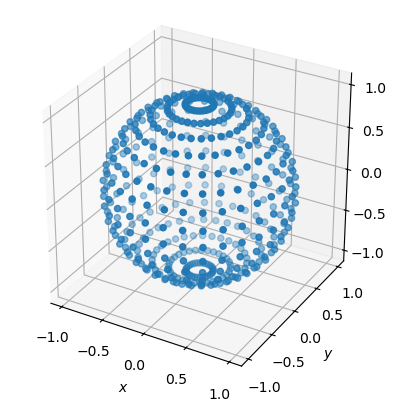

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
vector = pre_vector
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :])
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

## `gauss_legendre_trapezoidal_1d`

This function is almost the same than `gauss_legendre_trapezoidal_2d`, with the difference that the vectors are given in an array of one dimension (two if we add the dimension needed for represent a vector).

The following is the docstring of the function:

In [4]:
print(quadratures.gauss_legendre_trapezoidal_1d.__doc__)


    This function is for obtaining the quadratures points to
    approximate numerically the integral in a surface of a sphere.
    It returns the weights and vectors for the Gauss-Legendre and
    trapezoidal quadrature rule. See the shape of the returns.
    
    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with |m| <= big_l_c.

    Parameters
    ----------
    big_l_c : int
        >= 0. It's the parameter used to compute the points of the
        quadrature.

    Returns
    -------
    final_length : int
        how many points for the surface integral,
        = 

In [5]:
big_l_c = 15
final_length, total_weights, pre_vector = quadratures.gauss_legendre_trapezoidal_1d(big_l_c)

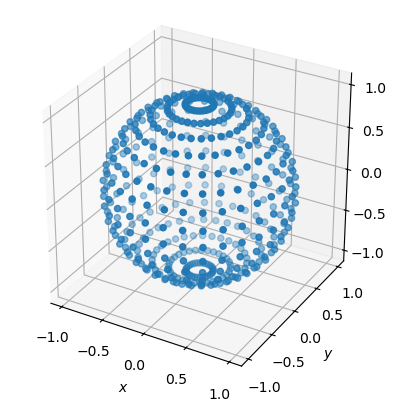

In [6]:
vector = pre_vector
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :],
    vector[1, :],
    vector[2, :])
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

## `gauss_legendre_trapezoidal_real_sh_mapping_2d`

This functions does the same than the function `gauss_legendre_trapezoidal_2d` and it also returns the evaluation of the real spherical harmonics in those points.

The following is its docstring:

In [7]:
print(quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d.__doc__)


    This function is for obtaining the quadratures points to
    approximate numerically the integral in a surface of a sphere, and
    it also returns the evaluation of the real spherical harmonics in
    those points.
    It returns the weights and vectors for the Gauss-Legendre and
    trapezoidal quadrature rule. The real spherical
    harmonics evaluated are of degree l and order m, with l <= big_l.
    See the shape of the returns.
    
    Notes
    -----
    Gauss-legendre quadrature in theta. This one uses the package
    pyshtools.
    Trapezoidal rule in phi.
    Integral on theta are (big_l_c + 1) quadrature points.
    Integral on phi are (2 * big_l_c + 1) quadrature points.
    Without considering errors produced by the approximation by finite
    numbers, the quadrature must be exact for functions consisting in
    polynomials of big_l_c degree times an exponential power to (m times
    i), with |m| <= big_l_c.
    Legendre's functions are computed used pyshtools.
    


Now, the variable `big_l` indicates the maximum degree of spherical harmonics to be computed.

In [8]:
big_l = 1

Also, there are auxiliar parameters needed

In [9]:
from biosspheres.miscella.auxindexes import pes_y_kus
pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q = pes_y_kus(big_l)

In [10]:
big_l_c = 50
quantity_theta_points, quantity_phi_points, weights, pre_vector, spherical_harmonics = quadratures.gauss_legendre_trapezoidal_real_sh_mapping_2d(big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

The following are the points of the quadrature plloted in a sphere:

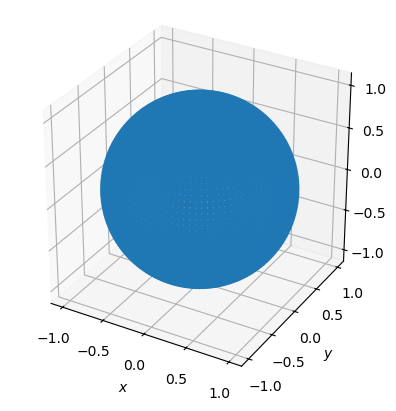

In [11]:
vector = pre_vector
fig = plt.figure()
ax_1 = fig.add_subplot(111, projection='3d')
ax_1.scatter3D(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :])
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
plt.show()

And the following are plottings of the spherical harmonics computed:

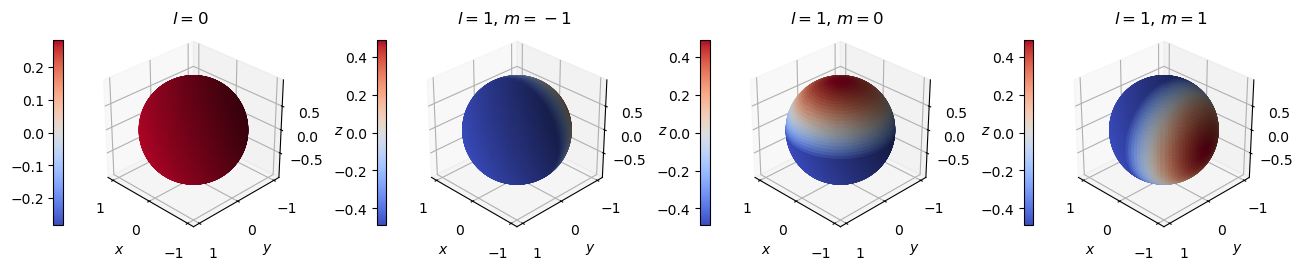

In [12]:
import numpy as np
fig = plt.figure(figsize=plt.figaspect(0.25))
ax_1 = fig.add_subplot(141, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[0, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[0, :, :]/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(142, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[1, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[1, :, :]/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = -1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(143, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[2, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[2, :, :]/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')


ax_1 = fig.add_subplot(144, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[3, :, :]))
ax_1.view_init(30, 135, 0)
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(spherical_harmonics[3, :, :]/surface_max))
ax_1.set_title('$l = 1$, $m = 1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')
plt.show()

## `gauss_legendre_trapezoidal_complex_sh_mapping_2d`

This functions does the same than `gauss_legendre_trapezoidal_complex_sh_mapping_2d`, with the difference that this time the complex spherical harmonics are evaluated.

In [13]:
quantity_theta_points, quantity_phi_points, weights, pre_vector, spherical_harmonics = quadratures.gauss_legendre_trapezoidal_complex_sh_mapping_2d(big_l, big_l_c, pesykus, p2_plus_p_plus_q, p2_plus_p_minus_q)

Plotting of the complex part of the spherical harmonics:

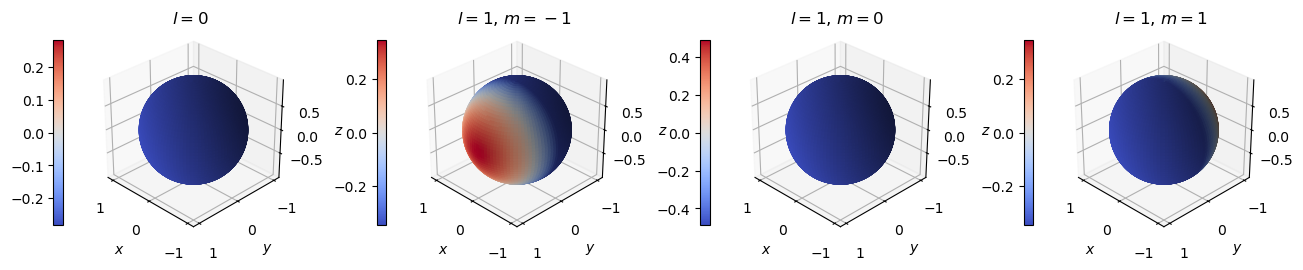

In [16]:
import numpy as np
fig = plt.figure(figsize=plt.figaspect(0.25))
ax_1 = fig.add_subplot(141, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[0, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[0, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(142, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[1, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[1, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = -1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')

ax_1 = fig.add_subplot(143, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[2, :, :]))
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[2, :, :])/surface_max))
ax_1.view_init(30, 135, 0)
ax_1.set_title('$l = 1$, $m = 0$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')


ax_1 = fig.add_subplot(144, projection='3d')
surface_max = np.max(np.abs(spherical_harmonics[3, :, :]))
ax_1.view_init(30, 135, 0)
ax_1.plot_surface(
    vector[0, :, :],
    vector[1, :, :],
    vector[2, :, :],
    rstride=1, cstride=1,
    facecolors=cm.coolwarm(np.imag(spherical_harmonics[3, :, :])/surface_max))
ax_1.set_title('$l = 1$, $m = 1$')
ax_1.set_xlabel('$x$')
ax_1.set_ylabel('$y$')
ax_1.set_zlabel('$z$')
ax_1.set_aspect('equal')
fig.colorbar(cm.ScalarMappable(norm=colors.CenteredNorm(halfrange=surface_max), cmap=cm.coolwarm), ax=ax_1, shrink=0.6, orientation='vertical', location='left')
plt.show()